In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\Admin\Desktop\Python Files\ML_Projects\credit_risk_dataset.csv")
df.head(10)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
6,26,77100,RENT,8.0,EDUCATION,B,35000,12.42,1,0.45,N,3
7,24,78956,RENT,5.0,MEDICAL,B,35000,11.11,1,0.44,N,4
8,24,83000,RENT,8.0,PERSONAL,A,35000,8.90,1,0.42,N,2
9,21,10000,OWN,6.0,VENTURE,D,1600,14.74,1,0.16,N,3


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [4]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [9]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [16]:
# Drop rows where column 'A' has null values
df_dropped = df.dropna(subset=['person_emp_length'], inplace=True)
print(df_dropped)

None


In [18]:
df_dropped = df.dropna(subset=['loan_int_rate'], inplace=True)
print(df_dropped)

None


In [19]:
df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [20]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
32576    False
32577    False
32578    False
32579    False
32580    False
Length: 28638, dtype: bool

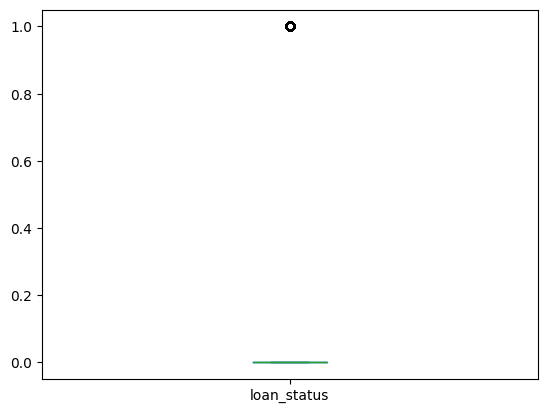

In [21]:
df['loan_status'].plot(kind="box")
plt.show()

In [22]:
numpy_array = np.array([df['loan_status']])
numpy_array

array([[1, 0, 1, ..., 1, 0, 0]], dtype=int64)

In [23]:
Q1 = np.percentile(numpy_array,25)
Q3 = np.percentile(numpy_array, 75)
print(Q1)
print(Q3)

0.0
0.0


In [24]:
IQR = Q3 - Q1
IQR

0.0

In [25]:
lowerlimit = Q1 - 1.5 * IQR
upperlimit = Q3 + 1.5 * IQR
print(upperlimit, lowerlimit)

0.0 0.0


In [26]:
outliers = df[(df['loan_status']<lowerlimit) | (df['loan_status']>upperlimit)]
outliers

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
...,...,...,...,...,...,...,...,...,...,...,...,...
32563,52,71520,RENT,0.0,EDUCATION,E,7000,16.82,1,0.10,Y,24
32565,57,40000,RENT,1.0,MEDICAL,A,15000,8.90,1,0.38,N,21
32571,60,45600,RENT,1.0,VENTURE,B,20000,10.00,1,0.44,N,26
32574,52,65004,RENT,4.0,PERSONAL,D,20000,15.58,1,0.31,Y,19


In [30]:
#checking the count of outliers
outliers.count()

person_age                    6203
person_income                 6203
person_home_ownership         6203
person_emp_length             6203
loan_intent                   6203
loan_grade                    6203
loan_amnt                     6203
loan_int_rate                 6203
loan_status                   6203
loan_percent_income           6203
cb_person_default_on_file     6203
cb_person_cred_hist_length    6203
dtype: int64

In [27]:
df['loan_status'] = np.clip(df['loan_status'], lowerlimit, upperlimit)
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,28638.000000,2.863800e+04,28638.000000,28638.000000,28638.000000,28638.0,28638.000000,28638.000000
mean,27.727216,6.664937e+04,4.788672,9656.493121,11.039867,0.0,0.169488,5.793736
std,6.310441,6.235645e+04,4.154627,6329.683361,3.229372,0.0,0.106393,4.038483
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.0,0.000000,2.000000
25%,23.000000,3.948000e+04,2.000000,5000.000000,7.900000,0.0,0.090000,3.000000
50%,26.000000,5.595600e+04,4.000000,8000.000000,10.990000,0.0,0.150000,4.000000
75%,30.000000,8.000000e+04,7.000000,12500.000000,13.480000,0.0,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,0.0,0.830000,30.000000


In [32]:
#checking wether outliers are there or not
outliers = df[(df.loan_status<lowerlimit)|(df.loan_status>upperlimit)]
outliers

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length


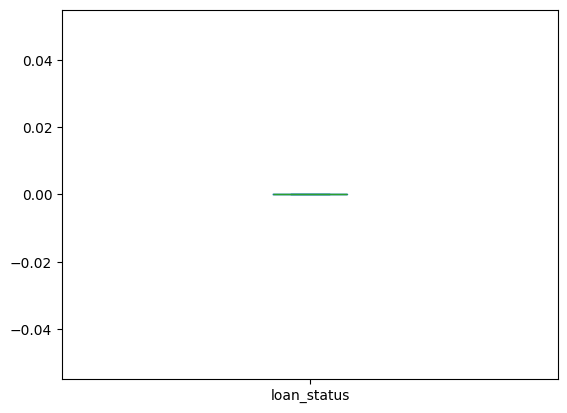

In [28]:
df['loan_status'].plot(kind="box")
plt.show()

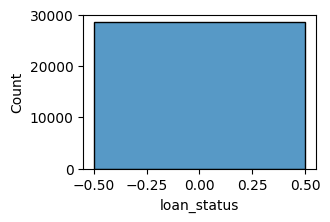

In [33]:
plt.figure(figsize=(3,2))
sns.histplot(df['loan_status'])
plt.show()

loan_intent
EDUCATION            5704
MEDICAL              5293
VENTURE              5001
PERSONAL             4877
DEBTCONSOLIDATION    4565
Name: count, dtype: int64


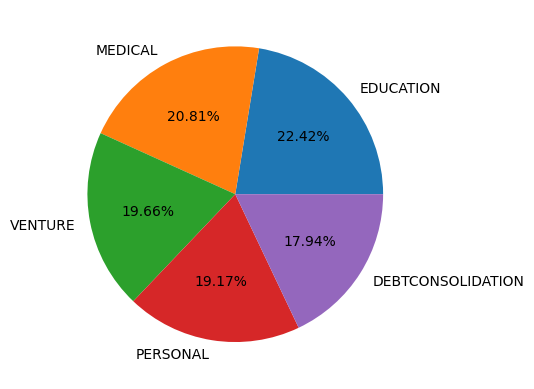

In [34]:
x = df['loan_intent'].value_counts().head(5)
print(x)
plt.pie(x.values, labels = x.index, autopct='%1.2f%%')
plt.show()

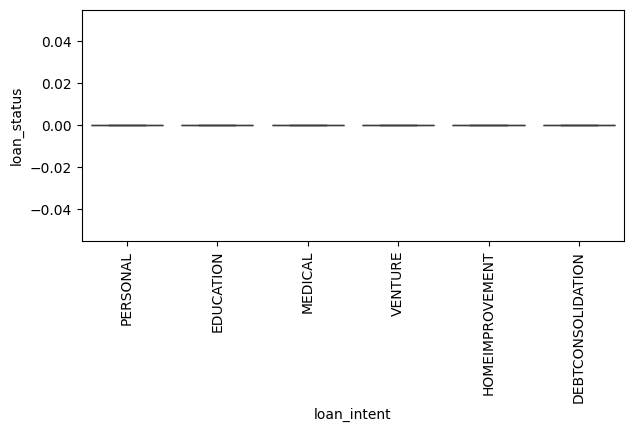

In [36]:
plt.figure(figsize=(7,3)) 
sns.boxplot(x=df['loan_intent'], y=df['loan_status']) 
plt.xticks(rotation = 90) 
plt.show()

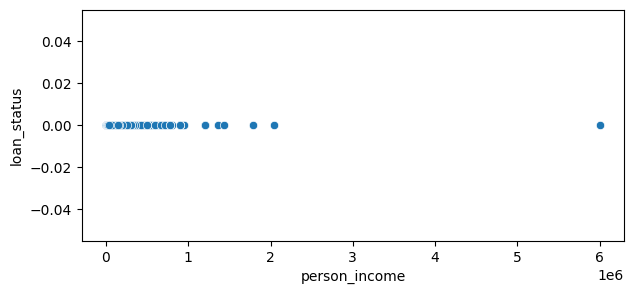

In [40]:
plt.figure(figsize=(7,3))
sns.scatterplot(x=df['person_income'], y=df['loan_status'])
plt.show()